In [3]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [4]:
!pip install pyspark

     |████████████████████████████████| 281.4 MB 37 kB/s 
     |████████████████████████████████| 198 kB 43.1 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=eb6888911ada95a2753f5f8efb89f5bbd01a072ef7862aae6fc71bd1cd3140aa
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


In [5]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

In [6]:
from pyspark.sql import SQLContext, SparkSession
from pyspark.sql import functions as f

In [7]:
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [8]:
spark

In [9]:
sc = spark.sparkContext
sqlContext = SQLContext(sc)

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:79: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


In [10]:
!wget https://github.com/AndrewSpitia/NodosBenchmark/archive/refs/heads/main.zip
!unzip main.zip

--2022-03-12 05:40:50--  https://github.com/AndrewSpitia/NodosBenchmark/archive/refs/heads/main.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/AndrewSpitia/NodosBenchmark/zip/refs/heads/main [following]
--2022-03-12 05:40:50--  https://codeload.github.com/AndrewSpitia/NodosBenchmark/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.113.10
Connecting to codeload.github.com (codeload.github.com)|140.82.113.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘main.zip’

main.zip                [ <=>                ]  36.19K  --.-KB/s    in 0.01s   

2022-03-12 05:40:51 (2.89 MB/s) - ‘main.zip’ saved [37054]

Archive:  main.zip
789b777d5e2a4995387a0b0c11524f15254e7966
   creating: NodosBenchmark-main/
 extracting: NodosBenchmark-ma

In [50]:
df = sqlContext.read.options(delimiter="\t").csv('NodosBenchmark-main/results/', header=False,inferSchema=True)

In [51]:
df.show()

+--------------------+
|                 _c0|
+--------------------+
|                   A|
|A 100 Algorithm1 ...|
|A 100 Algorithm1 ...|
|A 100 Algorithm1 ...|
|A 100 Algorithm1 ...|
|A 100 Algorithm1 ...|
|A 100 Algorithm1 ...|
|A 100 Algorithm1 ...|
|A 100 Algorithm1 ...|
|A 100 Algorithm1 ...|
|A 100 Algorithm1 ...|
|A 100 Algorithm1 ...|
|A 100 Algorithm1 ...|
|A 100 Algorithm1 ...|
|A 100 Algorithm1 ...|
|A 100 Algorithm1 ...|
|A 100 Algorithm1 ...|
|A 100 Algorithm1 ...|
|A 100 Algorithm1 ...|
|A 100 Algorithm1 ...|
+--------------------+
only showing top 20 rows



In [52]:
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
df = df.toPandas()
df

,_c0
0,A
1,A 100 Algorithm1 0.002088
2,A 100 Algorithm1 0.002088
3,A 100 Algorithm1 0.002086
4,A 100 Algorithm1 0.002049
...,...
3356,G
3357,G
3358,G
3359,G


In [44]:
df = df["_c0"].str.split(expand=True)
df.columns = ['nodo', 'carga','algoritmo','tiempo']

In [48]:
df

,nodo,carga,algoritmo,promedio
0,A,100,Algorithm1,0.002071
1,A,100,Algorithm2,0.008414
2,A,100,Algorithm3,0.003476
3,A,1000,Algorithm1,2.047640
4,A,1000,Algorithm2,12.764769
5,A,1000,Algorithm3,5.440691
6,A,1200,Algorithm1,3.541178
7,A,1200,Algorithm2,25.250933
8,A,1200,Algorithm3,12.809172
9,A,1400,Algorithm1,5.639706


In [45]:
df['tiempo'] =  pd.to_numeric(df["tiempo"], downcast="float")
df = df.groupby(['nodo','carga','algoritmo'])['tiempo'].mean().reset_index(name='promedio')


nodo
A    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

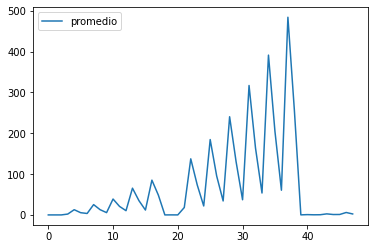

In [46]:
df.groupby('nodo').plot()